### Just recently, Facebook, in collaboration with researchers at Stanford and Monash University, released a new open-source time-series forecasting library called NeuralProphet. NeuralProphet is an extension of Prophet, a forecasting library that was released in 2017 by Facebook’s Core Data Science Team.


###  NeuralProphet is an upgraded version of Prophet that is built using PyTorch and uses deep learning models such as AR-Net for time-series forecasting. The main benefit of using NeuralProphet is that it features a simple API inspired by Prophet, but gives you access to more sophisticated deep learning models for time-series forecasting.

## IMPORT DEPENDENCIES

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import pickle

##   Read in Data and Process Dates

In [2]:
df=pd.read_csv('E://temp prediction//temp data for NEURALPROPHET.csv')  

In [3]:
df.head()

,LAT,LON,PLACE,YEAR,MONTH,DAY,PRECTOT,QV2M,RH2M,PS,...,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M
0,23.79831,86.44081,DHANBAD,2010,1,1,0.0,6.02,64.45,98.48,...,12.24,6.16,6.17,21.07,6.90,12.74,1.61,2.54,4.16,3.31
1,23.79831,86.44081,DHANBAD,2010,1,2,0.0,5.64,62.71,98.61,...,11.45,5.18,5.19,21.14,6.05,12.18,1.05,2.23,3.28,2.94
2,23.79831,86.44081,DHANBAD,2010,1,3,0.0,5.53,59.05,98.48,...,11.55,4.91,4.92,22.26,5.84,12.78,1.92,1.81,3.72,2.87
3,23.79831,86.44081,DHANBAD,2010,1,4,0.0,6.62,64.63,98.21,...,13.49,7.21,7.22,22.98,7.23,14.11,2.76,2.81,5.58,3.89
4,23.79831,86.44081,DHANBAD,2010,1,5,0.0,6.41,63.68,98.21,...,13.34,7.04,7.04,21.93,7.76,13.84,3.05,1.95,5.00,3.37


In [4]:
df.tail()

,LAT,LON,PLACE,YEAR,MONTH,DAY,PRECTOT,QV2M,RH2M,PS,...,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M
4013,23.79831,86.44081,DHANBAD,2020,12,27,0.0,5.81,54.58,98.30,...,12.39,5.70,5.59,22.52,7.00,14.72,2.79,0.37,3.16,1.98
4014,23.79831,86.44081,DHANBAD,2020,12,28,0.0,6.66,55.87,98.22,...,13.58,7.68,7.50,23.52,9.68,16.47,1.61,0.74,2.34,1.64
4015,23.79831,86.44081,DHANBAD,2020,12,29,0.0,8.02,69.25,98.30,...,14.79,10.45,10.26,23.74,9.67,16.01,1.91,1.38,3.29,2.31
4016,23.79831,86.44081,DHANBAD,2020,12,30,0.0,7.81,73.74,98.46,...,13.77,10.08,9.98,21.96,9.56,14.66,1.56,1.97,3.53,2.75
4017,23.79831,86.44081,DHANBAD,2020,12,31,0.0,6.31,62.46,98.49,...,12.90,6.95,6.77,22.43,8.08,13.93,2.61,2.32,4.93,3.36


In [5]:
# df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LAT          4018 non-null   float64
 1   LON          4018 non-null   float64
 2   PLACE        4018 non-null   object 
 3   YEAR         4018 non-null   int64  
 4   MONTH        4018 non-null   int64  
 5   DAY          4018 non-null   int64  
 6   PRECTOT      4018 non-null   float64
 7   QV2M         4018 non-null   float64
 8   RH2M         4018 non-null   float64
 9   PS           4018 non-null   float64
 10  T2M_RANGE    4018 non-null   float64
 11  TS           4018 non-null   float64
 12  T2MDEW       4018 non-null   float64
 13  T2MWET       4018 non-null   float64
 14  T2M_MAX      4018 non-null   float64
 15  T2M_MIN      4018 non-null   float64
 16  TEMPERATURE  4018 non-null   float64
 17  WS10M_RANGE  4018 non-null   float64
 18  WS10M_MIN    4018 non-null   float64
 19  WS10M_

In [6]:
#shape of df
df.shape

(4018, 21)

In [7]:
#size of df
df.size

84378

In [8]:
#information of column
list(df.columns)

['LAT',
 'LON',
 'PLACE',
 'YEAR',
 'MONTH',
 'DAY',
 'PRECTOT',
 'QV2M',
 'RH2M',
 'PS',
 'T2M_RANGE',
 'TS',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'TEMPERATURE',
 'WS10M_RANGE',
 'WS10M_MIN',
 'WS10M_MAX',
 'WS10M']

In [9]:
#describing the df
df.describe(include='all')

,LAT,LON,PLACE,YEAR,MONTH,DAY,PRECTOT,QV2M,RH2M,PS,...,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M
count,4.018000e+03,4.018000e+03,4018,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,...,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
unique,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,DHANBAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.379831e+01,8.644081e+01,NaN,2015.000747,6.522648,15.730463,3.734721,13.200694,63.718019,97.709783,...,24.957287,16.423425,16.392354,30.995943,19.580821,24.818935,2.715052,1.447061,4.162262,2.778721
std,1.382178e-12,4.263787e-14,NaN,3.162868,3.449210,8.801536,8.259530,5.616636,20.595098,0.607347,...,6.847388,7.369060,7.370596,5.875616,6.481406,6.019994,1.229423,0.934282,1.554611,1.097629
min,2.379831e+01,8.644081e+01,NaN,2010.000000,1.000000,1.000000,0.000000,3.230000,10.820000,95.950000,...,8.270000,-2.500000,-2.360000,14.920000,1.690000,8.700000,0.530000,0.010000,0.870000,0.490000
25%,2.379831e+01,8.644081e+01,NaN,2012.000000,4.000000,8.000000,0.000000,8.000000,47.402500,97.190000,...,19.402500,10.212500,10.190000,26.830000,14.042500,19.960000,1.810000,0.690000,3.030000,2.010000
50%,2.379831e+01,8.644081e+01,NaN,2015.000000,7.000000,16.000000,0.130000,12.500000,66.705000,97.720000,...,26.440000,17.030000,16.985000,30.475000,22.090000,26.475000,2.440000,1.340000,3.870000,2.600000
75%,2.379831e+01,8.644081e+01,NaN,2018.000000,10.000000,23.000000,3.955000,19.360000,82.150000,98.250000,...,29.360000,24.067500,24.047500,34.575000,24.960000,28.720000,3.410000,2.050000,5.017500,3.357500


### <h1><a id="2" style="color: black">II. DATA CLEANING</a></h1>

### 
<h2><Li style="list-style-type: square"><span style="color: black">Statement:</span></Li></h2>
<li>Perform data cleaning using pandas library. Which includes replacing the miscoded information and handling missing data.</li>

In [10]:
# information of df before cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LAT          4018 non-null   float64
 1   LON          4018 non-null   float64
 2   PLACE        4018 non-null   object 
 3   YEAR         4018 non-null   int64  
 4   MONTH        4018 non-null   int64  
 5   DAY          4018 non-null   int64  
 6   PRECTOT      4018 non-null   float64
 7   QV2M         4018 non-null   float64
 8   RH2M         4018 non-null   float64
 9   PS           4018 non-null   float64
 10  T2M_RANGE    4018 non-null   float64
 11  TS           4018 non-null   float64
 12  T2MDEW       4018 non-null   float64
 13  T2MWET       4018 non-null   float64
 14  T2M_MAX      4018 non-null   float64
 15  T2M_MIN      4018 non-null   float64
 16  TEMPERATURE  4018 non-null   float64
 17  WS10M_RANGE  4018 non-null   float64
 18  WS10M_MIN    4018 non-null   float64
 19  WS10M_

In [11]:
# # dropping unnecessary Columns. (which includes text.)
# #cols = ['LAT','LON','PLACE','PRECIPITATION','SPECIFIC _HUMIDITY','RELATIVE_HUMIDITY','SURFACE_PRESSURE','T2M_RANGE','EARTH_SKIN_TEMPERATURE','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','WS10M_MIN','WS10M_MAX','WS50M','WIND_SPEED']
# cols = ['LAT','LON','PRECTOT','QV2M','RH2M','PS','T2M_RANGE','TS','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','WS10M_MIN','WS10M_MAX','WS10M','WS10M_RANGE']
# df2 = df2.drop(cols,axis=1)

In [12]:
#combining YEAR ,MONTH,DAY in a single column
df["DATE"] = pd.to_datetime(df[['YEAR','MONTH','DAY']])

In [13]:
df.tail()

,LAT,LON,PLACE,YEAR,MONTH,DAY,PRECTOT,QV2M,RH2M,PS,...,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M,DATE
4013,23.79831,86.44081,DHANBAD,2020,12,27,0.0,5.81,54.58,98.30,...,5.70,5.59,22.52,7.00,14.72,2.79,0.37,3.16,1.98,2020-12-27
4014,23.79831,86.44081,DHANBAD,2020,12,28,0.0,6.66,55.87,98.22,...,7.68,7.50,23.52,9.68,16.47,1.61,0.74,2.34,1.64,2020-12-28
4015,23.79831,86.44081,DHANBAD,2020,12,29,0.0,8.02,69.25,98.30,...,10.45,10.26,23.74,9.67,16.01,1.91,1.38,3.29,2.31,2020-12-29
4016,23.79831,86.44081,DHANBAD,2020,12,30,0.0,7.81,73.74,98.46,...,10.08,9.98,21.96,9.56,14.66,1.56,1.97,3.53,2.75,2020-12-30
4017,23.79831,86.44081,DHANBAD,2020,12,31,0.0,6.31,62.46,98.49,...,6.95,6.77,22.43,8.08,13.93,2.61,2.32,4.93,3.36,2020-12-31


In [14]:
# dropping unnecessary Columns. (which includes text.)
cols = ['DAY','MONTH','YEAR']
df = df.drop(cols,axis=1)

In [15]:
# shift column 'DATE' to first position
first_column = df.pop('DATE')

In [16]:
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'DATE', first_column)

In [17]:
# information  of df  after arranging the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         4018 non-null   datetime64[ns]
 1   LAT          4018 non-null   float64       
 2   LON          4018 non-null   float64       
 3   PLACE        4018 non-null   object        
 4   PRECTOT      4018 non-null   float64       
 5   QV2M         4018 non-null   float64       
 6   RH2M         4018 non-null   float64       
 7   PS           4018 non-null   float64       
 8   T2M_RANGE    4018 non-null   float64       
 9   TS           4018 non-null   float64       
 10  T2MDEW       4018 non-null   float64       
 11  T2MWET       4018 non-null   float64       
 12  T2M_MAX      4018 non-null   float64       
 13  T2M_MIN      4018 non-null   float64       
 14  TEMPERATURE  4018 non-null   float64       
 15  WS10M_RANGE  4018 non-null   float64       
 16  WS10M_

In [18]:
# Showing First five elements after arrangement
df.head()

,DATE,LAT,LON,PLACE,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M
0,2010-01-01,23.79831,86.44081,DHANBAD,0.0,6.02,64.45,98.48,14.17,12.24,6.16,6.17,21.07,6.90,12.74,1.61,2.54,4.16,3.31
1,2010-01-02,23.79831,86.44081,DHANBAD,0.0,5.64,62.71,98.61,15.09,11.45,5.18,5.19,21.14,6.05,12.18,1.05,2.23,3.28,2.94
2,2010-01-03,23.79831,86.44081,DHANBAD,0.0,5.53,59.05,98.48,16.42,11.55,4.91,4.92,22.26,5.84,12.78,1.92,1.81,3.72,2.87
3,2010-01-04,23.79831,86.44081,DHANBAD,0.0,6.62,64.63,98.21,15.74,13.49,7.21,7.22,22.98,7.23,14.11,2.76,2.81,5.58,3.89
4,2010-01-05,23.79831,86.44081,DHANBAD,0.0,6.41,63.68,98.21,14.17,13.34,7.04,7.04,21.93,7.76,13.84,3.05,1.95,5.00,3.37


In [19]:
#writting from here
type(df)

pandas.core.frame.DataFrame

In [20]:
df.head()

,DATE,LAT,LON,PLACE,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M
0,2010-01-01,23.79831,86.44081,DHANBAD,0.0,6.02,64.45,98.48,14.17,12.24,6.16,6.17,21.07,6.90,12.74,1.61,2.54,4.16,3.31
1,2010-01-02,23.79831,86.44081,DHANBAD,0.0,5.64,62.71,98.61,15.09,11.45,5.18,5.19,21.14,6.05,12.18,1.05,2.23,3.28,2.94
2,2010-01-03,23.79831,86.44081,DHANBAD,0.0,5.53,59.05,98.48,16.42,11.55,4.91,4.92,22.26,5.84,12.78,1.92,1.81,3.72,2.87
3,2010-01-04,23.79831,86.44081,DHANBAD,0.0,6.62,64.63,98.21,15.74,13.49,7.21,7.22,22.98,7.23,14.11,2.76,2.81,5.58,3.89
4,2010-01-05,23.79831,86.44081,DHANBAD,0.0,6.41,63.68,98.21,14.17,13.34,7.04,7.04,21.93,7.76,13.84,3.05,1.95,5.00,3.37


In [21]:
df.PLACE.unique()

array(['DHANBAD'], dtype=object)

In [22]:
df.columns

Index(['DATE', 'LAT', 'LON', 'PLACE', 'PRECTOT', 'QV2M', 'RH2M', 'PS',
       'T2M_RANGE', 'TS', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN',
       'TEMPERATURE', 'WS10M_RANGE', 'WS10M_MIN', 'WS10M_MAX', 'WS10M'],
      dtype='object')

In [23]:
df.dtypes

DATE           datetime64[ns]
LAT                   float64
LON                   float64
PLACE                  object
PRECTOT               float64
QV2M                  float64
RH2M                  float64
PS                    float64
T2M_RANGE             float64
TS                    float64
T2MDEW                float64
T2MWET                float64
T2M_MAX               float64
T2M_MIN               float64
TEMPERATURE           float64
WS10M_RANGE           float64
WS10M_MIN             float64
WS10M_MAX             float64
WS10M                 float64
dtype: object

In [24]:
dhn = df[df['PLACE']=='DHANBAD']
dhn['DATE'] = pd.to_datetime(dhn['DATE'])
dhn.head()

,DATE,LAT,LON,PLACE,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M
0,2010-01-01,23.79831,86.44081,DHANBAD,0.0,6.02,64.45,98.48,14.17,12.24,6.16,6.17,21.07,6.90,12.74,1.61,2.54,4.16,3.31
1,2010-01-02,23.79831,86.44081,DHANBAD,0.0,5.64,62.71,98.61,15.09,11.45,5.18,5.19,21.14,6.05,12.18,1.05,2.23,3.28,2.94
2,2010-01-03,23.79831,86.44081,DHANBAD,0.0,5.53,59.05,98.48,16.42,11.55,4.91,4.92,22.26,5.84,12.78,1.92,1.81,3.72,2.87
3,2010-01-04,23.79831,86.44081,DHANBAD,0.0,6.62,64.63,98.21,15.74,13.49,7.21,7.22,22.98,7.23,14.11,2.76,2.81,5.58,3.89
4,2010-01-05,23.79831,86.44081,DHANBAD,0.0,6.41,63.68,98.21,14.17,13.34,7.04,7.04,21.93,7.76,13.84,3.05,1.95,5.00,3.37


In [25]:
dhn.dtypes

DATE           datetime64[ns]
LAT                   float64
LON                   float64
PLACE                  object
PRECTOT               float64
QV2M                  float64
RH2M                  float64
PS                    float64
T2M_RANGE             float64
TS                    float64
T2MDEW                float64
T2MWET                float64
T2M_MAX               float64
T2M_MIN               float64
TEMPERATURE           float64
WS10M_RANGE           float64
WS10M_MIN             float64
WS10M_MAX             float64
WS10M                 float64
dtype: object

## Ploting the dataset

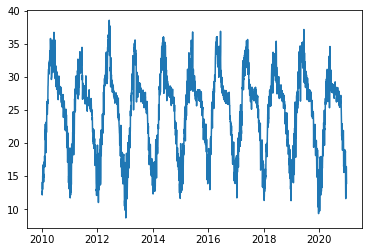

In [26]:
plt.plot(dhn['DATE'], dhn['TEMPERATURE'])
plt.show()
#plt.plot(dhn['TEMPERATURE'])
#plt.show()

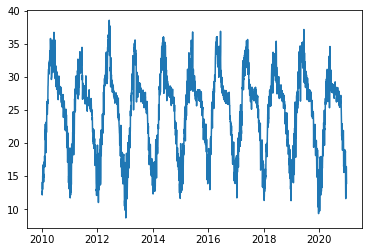

In [27]:
dhn['Year'] = dhn['DATE'].apply(lambda x: x.year)
dhn = dhn[dhn['Year']<=2020]
plt.plot(dhn['DATE'], dhn['TEMPERATURE'])
plt.show()

In [28]:
dhn.head()

,DATE,LAT,LON,PLACE,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M,Year
0,2010-01-01,23.79831,86.44081,DHANBAD,0.0,6.02,64.45,98.48,14.17,12.24,6.16,6.17,21.07,6.90,12.74,1.61,2.54,4.16,3.31,2010
1,2010-01-02,23.79831,86.44081,DHANBAD,0.0,5.64,62.71,98.61,15.09,11.45,5.18,5.19,21.14,6.05,12.18,1.05,2.23,3.28,2.94,2010
2,2010-01-03,23.79831,86.44081,DHANBAD,0.0,5.53,59.05,98.48,16.42,11.55,4.91,4.92,22.26,5.84,12.78,1.92,1.81,3.72,2.87,2010
3,2010-01-04,23.79831,86.44081,DHANBAD,0.0,6.62,64.63,98.21,15.74,13.49,7.21,7.22,22.98,7.23,14.11,2.76,2.81,5.58,3.89,2010
4,2010-01-05,23.79831,86.44081,DHANBAD,0.0,6.41,63.68,98.21,14.17,13.34,7.04,7.04,21.93,7.76,13.84,3.05,1.95,5.00,3.37,2010


In [29]:
dhn.tail()

,DATE,LAT,LON,PLACE,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,TEMPERATURE,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M,Year
4013,2020-12-27,23.79831,86.44081,DHANBAD,0.0,5.81,54.58,98.30,15.52,12.39,5.70,5.59,22.52,7.00,14.72,2.79,0.37,3.16,1.98,2020
4014,2020-12-28,23.79831,86.44081,DHANBAD,0.0,6.66,55.87,98.22,13.84,13.58,7.68,7.50,23.52,9.68,16.47,1.61,0.74,2.34,1.64,2020
4015,2020-12-29,23.79831,86.44081,DHANBAD,0.0,8.02,69.25,98.30,14.07,14.79,10.45,10.26,23.74,9.67,16.01,1.91,1.38,3.29,2.31,2020
4016,2020-12-30,23.79831,86.44081,DHANBAD,0.0,7.81,73.74,98.46,12.40,13.77,10.08,9.98,21.96,9.56,14.66,1.56,1.97,3.53,2.75,2020
4017,2020-12-31,23.79831,86.44081,DHANBAD,0.0,6.31,62.46,98.49,14.35,12.90,6.95,6.77,22.43,8.08,13.93,2.61,2.32,4.93,3.36,2020


###  In order to train NeuralProphet on a dataset, we need to make sure that the data is formatted so that the date column is named ds and the column with the target variable is named y. In the code below, I rearranged the original dataset to match the format expected by NeuralProphet.


#### prcp_data = data.rename(columns={'DATE': 'ds', 'PRCP': 'y'})[['ds', 'y']]

In [30]:
data = dhn[['DATE', 'TEMPERATURE']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

<ipython-input-30-0d2ab52e344d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,ds,y
0,2010-01-01,12.74
1,2010-01-02,12.18
2,2010-01-03,12.78
3,2010-01-04,14.11
4,2010-01-05,13.84


In [31]:
data

,ds,y
0,2010-01-01,12.74
1,2010-01-02,12.18
2,2010-01-03,12.78
3,2010-01-04,14.11
4,2010-01-05,13.84
...,...,...
4013,2020-12-27,14.72
4014,2020-12-28,16.47
4015,2020-12-29,16.01
4016,2020-12-30,14.66


## Train  Model

### Now that the data is in the correct format, we can train and validate a NeuralProphet model with just a few lines of code. The fit function used below uses the following parameters:


###  The data used for training/validation.


### validate_each_epoch — a flag indicating whether or not to validate the model’s performance on the validation data in each epoch.


###  valid_p — a float between 0 and 1 indicating the proportion of the data that should be used for validation.


###  plot_live_loss — a flag indicating whether or not to generate a live plot of the model’s training and validation loss.
 

###  epochs — the number of epochs that the model should be trained for.

#####  The syntex should be in this formate

In [32]:
# model = NeuralProphet()
# metrics = model.fit(prcp_data, validate_each_epoch=True, 
#                     valid_p=0.2, freq='D', 
#                     plot_live_loss=True, epochs=10)

In [33]:
m = NeuralProphet()
model = m.fit(data, freq='D', epochs=1000)

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [04:51<00:00,  3.44it/s, SmoothL1Loss=0.00166, MAE=1.33, RegLoss=0]


## Forecast  the data

In [34]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head(230)

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2021-01-01,None,13.715752,None,24.222149,-10.510229,0.003832
1,2021-01-02,None,13.662452,None,24.221544,-10.539920,-0.019173
2,2021-01-03,None,13.681776,None,24.220942,-10.559530,0.020366
3,2021-01-04,None,13.640966,None,24.220337,-10.568931,-0.010441
4,2021-01-05,None,13.658302,None,24.219732,-10.568048,0.006617
...,...,...,...,...,...,...,...
225,2021-08-14,None,26.847424,None,24.086172,2.780424,-0.019173
226,2021-08-15,None,26.860071,None,24.085567,2.754138,0.020366
227,2021-08-16,None,26.800678,None,24.084963,2.726158,-0.010441
228,2021-08-17,None,26.787634,None,24.084358,2.696659,0.006617


## Forcasting plot

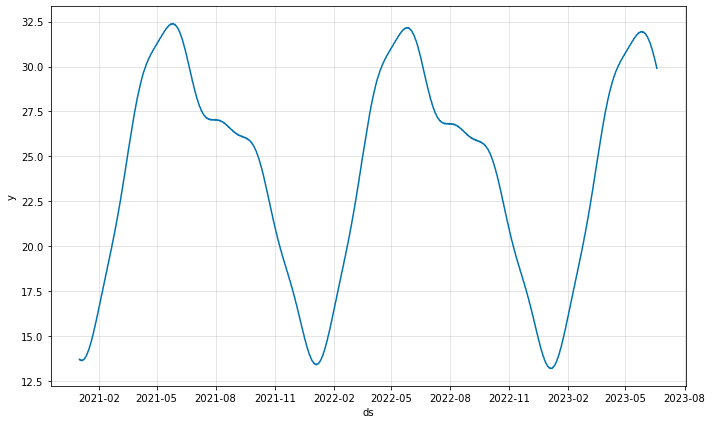

In [35]:
plot1 = m.plot(forecast)

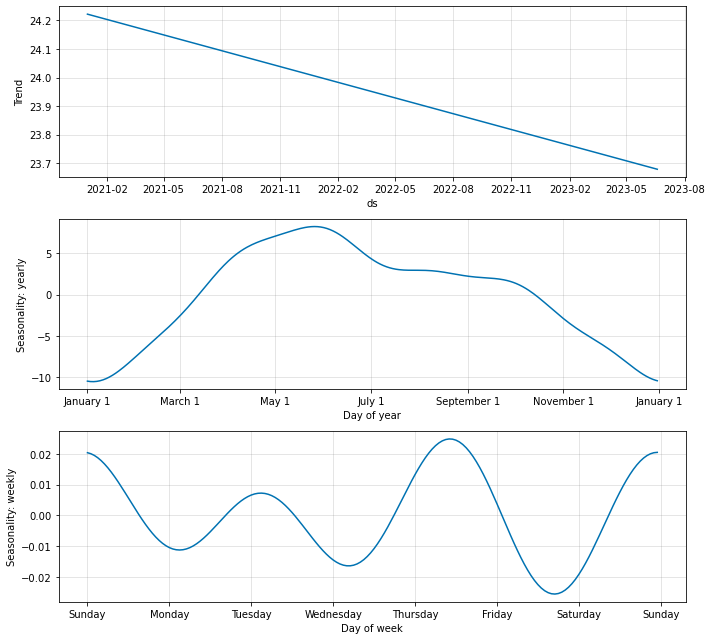

In [36]:
plt2 = m.plot_components(forecast)

## Save  the Model

In [37]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [38]:
del m

In [39]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [43]:
future = m.make_future_dataframe(data, periods=17000)
forecast = m.predict(future)
forecast.head(230)

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2021-01-01,None,13.715752,None,24.222149,-10.510229,0.003832
1,2021-01-02,None,13.662452,None,24.221544,-10.539920,-0.019173
2,2021-01-03,None,13.681776,None,24.220942,-10.559530,0.020366
3,2021-01-04,None,13.640966,None,24.220337,-10.568931,-0.010441
4,2021-01-05,None,13.658302,None,24.219732,-10.568048,0.006617
...,...,...,...,...,...,...,...
225,2021-08-14,None,26.847424,None,24.086172,2.780424,-0.019173
226,2021-08-15,None,26.860071,None,24.085567,2.754138,0.020366
227,2021-08-16,None,26.800678,None,24.084963,2.726158,-0.010441
228,2021-08-17,None,26.787634,None,24.084358,2.696659,0.006617


## Forcasting plot for next 17000 periods

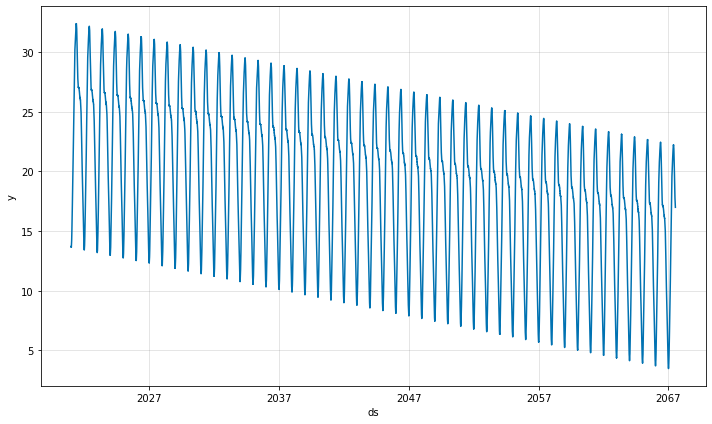

In [41]:
plot1 = m.plot(forecast)